In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Data Prepration and visualization

In [8]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
df = pd.read_csv('/home/satyukt/abhishek/time series/pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
df.drop('No', axis=1, inplace=True)
df.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
df.index.name = 'date'
df.fillna(0,inplace=True)
df=df[24:]
df.to_csv('pollution1.csv')

In [9]:
df = pd.read_csv('pollution1.csv',parse_dates=['date'],header=0,index_col=0)
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


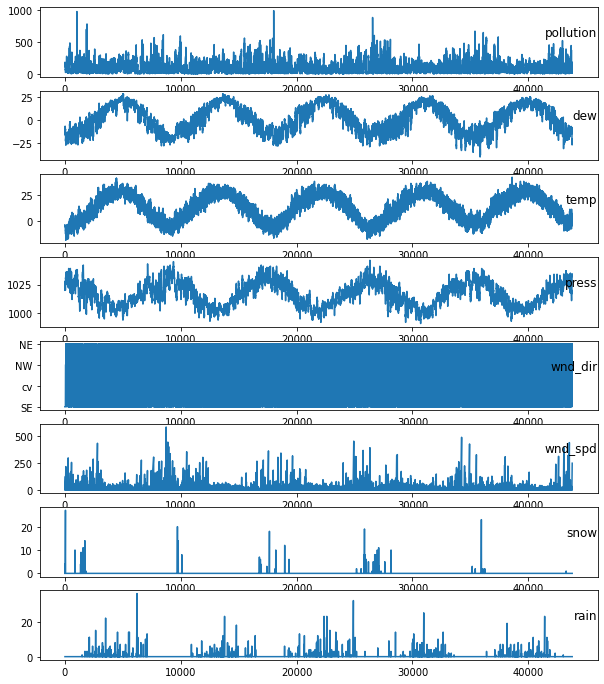

In [42]:
values=df.values
groups=[i for i in range(df.shape[1])]
plt.figure(figsize=(10,12))
i=1
for group in groups:
    plt.subplot(len(groups),1,i)
    plt.plot(values[:,group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i+=1
plt.show()

# LSTM Model Building
Preprocessing

In [43]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [44]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [45]:
#The wind direction feature is label encoded (integer encoded).
encoder=LabelEncoder()
values[:,4]=encoder.fit_transform(values[:,4])

In [46]:
values=values.astype('float32')

In [47]:
# normalize features
scaler=MinMaxScaler(feature_range=(0,1))
values=scaler.fit_transform(values)

In [48]:
# frame as supervised learning
reframed = series_to_supervised(values, 1, 1)

In [49]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0


In [50]:
#Drop the values that your not predecting
reframed=reframed.drop(['var2(t)', 'var3(t)',
       'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)'],axis=1)

In [51]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


### var1(t-1)	var2(t-1)	var3(t-1)	var4(t-1)	var5(t-1)	var6(t-1)	var7(t-1)	var8(t-1) will be X and var1(t) will be Y.

In [52]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:3*n_train_hours, :]
val=values[3*n_train_hours:4*n_train_hours,:]
test = values[4*n_train_hours:, :]

In [53]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
val_X,val_y=val[:,:-1],val[:,-1]
test_X, test_y = test[:, :-1], test[:, -1]

In [54]:
train_X.shape,val_X.shape,test_X.shape,values.shape

((26280, 8), (8760, 8), (8759, 8), (43799, 9))

#### reshape input to be 3D [samples, timesteps, features]### # reshape input to be 3D [samples, timesteps, features]

In [55]:
train_X=train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
val_X=val_X.reshape((val_X.shape[0],1,val_X.shape[1]))
test_X=test_X.reshape((test_X.shape[0],1,test_X.shape[1]))
print(train_X.shape,train_y.shape,val_X.shape,val_y.shape,test_X.shape,test_y.shape)

(26280, 1, 8) (26280,) (8760, 1, 8) (8760,) (8759, 1, 8) (8759,)


In [24]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.layers import Dropout

In [25]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10,restore_best_weights=True)

In [32]:
# design network
model = Sequential()

# Adding a first LSTM layer and Dropout layer
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))


model.add(Dense(1))


model.compile(loss='mae', optimizer='adam')


In [33]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_data=(val_X,val_y), callbacks=[early_stopping],verbose=2, shuffle=False)


Epoch 1/50
2628/2628 - 4s - loss: 0.0227 - val_loss: 0.0163
Epoch 2/50
2628/2628 - 5s - loss: 0.0147 - val_loss: 0.0163
Epoch 3/50
2628/2628 - 5s - loss: 0.0146 - val_loss: 0.0150
Epoch 4/50
2628/2628 - 5s - loss: 0.0144 - val_loss: 0.0147
Epoch 5/50
2628/2628 - 3s - loss: 0.0142 - val_loss: 0.0159
Epoch 6/50
2628/2628 - 2s - loss: 0.0142 - val_loss: 0.0154
Epoch 7/50
2628/2628 - 3s - loss: 0.0141 - val_loss: 0.0156
Epoch 8/50
2628/2628 - 3s - loss: 0.0141 - val_loss: 0.0167
Epoch 9/50
2628/2628 - 3s - loss: 0.0140 - val_loss: 0.0163
Epoch 10/50
2628/2628 - 4s - loss: 0.0139 - val_loss: 0.0147
Epoch 11/50
2628/2628 - 4s - loss: 0.0138 - val_loss: 0.0146
Epoch 12/50
2628/2628 - 5s - loss: 0.0139 - val_loss: 0.0161
Epoch 13/50
2628/2628 - 7s - loss: 0.0138 - val_loss: 0.0157


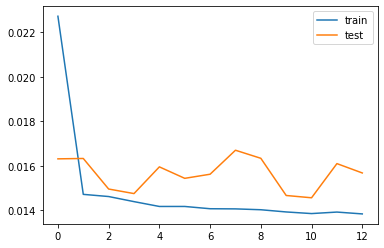

In [57]:
# plot history
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [58]:
# evaluate the model
train_acc = model.evaluate(train_X, train_y, verbose=0)
test_acc = model.evaluate(test_X, test_y, verbose=0)

In [59]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 24.635
